# Big Data Analytics - Project - 2021

### Authors: Kirill ??, Lilith Feer, Luca ??, Mark ??, Remo ??
### Matrikel-Nr.: ???, 16720799, ???, ???, ???

## Goal

### Goal Description

# 

## Packages & Libraries

In [127]:
#install.packages("BiocManager")
#BiocManager::install("Rgraphviz")

#install.packages("data.table")
#install.packages("dplyr")
#BiocManager::install("outliers")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.12 (BiocManager 1.30.15), R 4.0.4 (2021-02-15)

Warning message:
"package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'outliers'"
Installation paths not writeable, unable to update packages
  path: C:/Program Files/R/R-4.0.4/library
  packages:
    boot, class, cluster, KernSmooth, lattice, MASS, Matrix, mgcv, nnet,
    spatial, survival

Old packages: 'colorspace', 'curl', 'dplyr', 'ellipsis', 'haven', 'installr',
  'openssl', 'processx', 'raster', 'rlang', 'rmarkdown', 'statmod', 'stringi',
  'tibble', 'tidyselect', 'vctrs', 'viridis', 'xfun'



In [2]:
library(ggplot2)
library(data.table)
library("dplyr") 
library(tidyr)
library(outliers)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



ERROR: Error in library(outliers): there is no package called ‘outliers’


## Dataset
### Description:
#### Pancreatic cancer arises from the abnormal and uncontrolled growth of cells in the tissues of the pancreas. Pancreatic adenocarcinoma (PAAD) is the most common type of pancreatic cancer, accounting for approximately 85% of all types of pancreatic cancer. This cancer is the twelfth most common cancer and the seventh leading cause of cancer-related death. [01]

#### The dataset contains normalized RNA Sequencing reads for pancreatic cancer tumors. The measurement consists of ~20,000 genes for 185 pancreatic cancer tumors. The file format is GCT , a tab-delimited file used for sharing gene expression data and metadata (details for each sample) for samples.

### Link:
### https://www.kaggle.com/abhiparashar/cancer-prediction?select=PAAD.gct

### Load:

In [3]:
# 1 -  Read gct:
# original_dataset <- read.gct("Data/PAAD.gct")

# 2 - Read in data.table format:                    # Setting Participant ID as column Name -> skip = 3
original_dataset <- fread("Data/PAAD.gct", skip = 3, quote = "", header = TRUE, sep = "\t")

In [11]:
# Dimensions of the dataset
dimensions <- dim(original_dataset)
message("The dimensions of the dataset are: ","Rows = ",dimensions[1] ," and Columns = ",dimensions[2])

# Overview of types of Data
#str(original_dataset)

# Patients IDs
patients_IDs <- colnames(original_dataset)

# Features
rownames <- original_dataset[,1]

# Attributes
#attributes(original_dataset)

head(original_dataset,20)

The dimensions of the dataset are: Rows = 18588 and Columns = 184


participant_id,aab1,aab4,aab6,aab8,aab9,aaba,aabe,aabf,aabh,...,aauh,aaui,aaul,a8t3,a8t5,a89d,a89d.1,a8sy,a8lh,aapl
sample_type,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,...,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Solid Tissue Normal,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor
mRNAseq_cluster,1,2,3,1,4,3,3,2,2,...,2,5,3,4,5,,2,3,1,5
bcr_patient_barcode,tcga-2j-aab1,tcga-2j-aab4,tcga-2j-aab6,tcga-2j-aab8,tcga-2j-aab9,tcga-2j-aaba,tcga-2j-aabe,tcga-2j-aabf,tcga-2j-aabh,...,tcga-xd-aauh,tcga-xd-aaui,tcga-xd-aaul,tcga-xn-a8t3,tcga-xn-a8t5,tcga-yb-a89d,tcga-yb-a89d,tcga-yh-a8sy,tcga-yy-a8lh,tcga-z5-aapl
bcr_patient_uuid,75119d1a-93e5-4ae7-9d60-69ee929a0772,33833131-1482-42d5-9cf5-01cade540234,70797499-16e6-48cc-8ae4-1e692713dad3,2e8f90f4-aed3-43b0-985c-dfdc2581f24f,a5748656-5330-417a-8938-01f69ddb3576,e3a19e63-bae5-498b-9687-41194aa5728d,58c1c391-5ea3-4432-bb1e-e7e1974954bc,886d6116-d496-444f-9b7b-7449dad31055,c53328b4-0930-4e6a-a648-283b5565295e,...,b46b5a4c-59fc-4769-b05a-d15f9aaa753a,9a2db69e-d429-45d4-89ca-a2c4e0cfc116,597a5a56-244b-4218-a55d-5d08217ea28c,dd7bcdd8-1660-4dab-9860-9d136c4cee77,382b279f-87e1-4dbc-a2ca-c1dfde1cf254,b84b58c7-95b8-4162-8e61-414f8fe422c6,b84b58c7-95b8-4162-8e61-414f8fe422c6,503d7e36-df78-428d-9971-09ff707645c2,ede2e8a7-465e-4725-880d-519899aba0c0,6a4e10b6-e6c4-4210-ae4d-0d8e8d0cb3ec
vital_status,dead,alive,dead,alive,dead,dead,alive,dead,alive,...,alive,dead,alive,alive,alive,alive,alive,alive,alive,alive
days_to_death,66,NA,293,NA,627,607,NA,691,NA,...,NA,366,NA,NA,NA,NA,NA,NA,NA,NA
days_to_last_followup,NA,729,NA,80,NA,NA,676,NA,1287,...,395,NA,498,951,720,350,350,388,2016,467
additional_studies,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
adenocarcinoma_invasion,yes,yes,yes,yes,yes,yes,yes,yes,yes,...,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes
age_at_initial_pathologic_diagnosis,65,48,75,71,70,55,73,73,61,...,57,50,56,67,53,59,59,73,61,74


### Separate the two data sets (meta data and expression data)

In [16]:
Expression_data <- original_dataset[124:length(original_dataset$participant_id),]
Patient_data <- original_dataset[1:123,]

### Transpose the data sets

In [13]:
transposefunction <- function(dataset){
    rowname <- dataset$participant_id
    colname <- 1:length(original_dataset[1,])
    transposed_dataset <- transpose(dataset)
    rownames(transposed_dataset) <- colname
    colnames(transposed_dataset) <- rowname
    transposed_dataset <- transposed_dataset[2:nrow(transposed_dataset),]
    return(transposed_dataset)
}

t_expression_data <- transposefunction(Expression_data)
t_patient_data <- transposefunction(Patient_data)

dimensions <- dim(t_expression_data)
message("The dimensions of the Expression dataset are: ","Rows = ",dimensions[1] ," and Columns = ",dimensions[2])
dimensions <- dim(t_patient_data)
message("The dimensions of the Patient dataset are: ","Rows = ",dimensions[1] ," and Columns = ",dimensions[2])

The dimensions of the Expression dataset are: Rows = 183 and Columns = 18465
The dimensions of the Patient dataset are: Rows = 183 and Columns = 123


In [14]:
# convert the whole data set into floats
t_expression_data[] <- lapply(t_expression_data, function(x) {as.numeric(as.character(x))})

dimensions <- dim(t_expression_data)
dimensions[1]*dimensions[2]

table(is.na(t_expression_data))

summary(is.na(t_expression_data))
## there are 134'954 missing values (from 3'379'095 total) in the expression data set

[1] 3379095


  FALSE    TRUE 
3244141  134954 

  SLC35E2           A1BG            A1CF           A2BP1        
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:183       FALSE:183       FALSE:181       FALSE:141      
                                 TRUE :2         TRUE :42       
   A2LD1           A2ML1            A2M            A4GALT       
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:183       FALSE:156       FALSE:183       FALSE:183      
                 TRUE :27                                       
   A4GNT            AAA1            AAAS           AACSL        
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:174       FALSE:125       FALSE:183       FALSE:107      
 TRUE :9         TRUE :58                        TRUE :76       
    AACS           AADAC           AADAT           AAGAB        
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:183       FALSE:179       FALSE:183       FALSE:183      
                 TRUE :4 

In [15]:
table(is.na(t_patient_data))

dimensions <- dim(t_patient_data)
dimensions[1]*dimensions[2]

summary(is.na(t_patient_data))
## 9654 of 22632 are missing values --> but some have a meaning (e.g. when patients haven't died days_to_death is NA)


FALSE  TRUE 
12855  9654 

[1] 22509

 sample_type     mRNAseq_cluster bcr_patient_barcode bcr_patient_uuid
 Mode :logical   Mode :logical   Mode :logical       Mode :logical   
 FALSE:183       FALSE:183       FALSE:183           FALSE:183       
                                                                     
 vital_status    days_to_death   days_to_last_followup additional_studies
 Mode :logical   Mode :logical   Mode :logical         Mode:logical      
 FALSE:183       FALSE:95        FALSE:88              TRUE:183          
                 TRUE :88        TRUE :95                                
 adenocarcinoma_invasion age_at_initial_pathologic_diagnosis
 Mode :logical           Mode :logical                      
 FALSE:183               FALSE:183                          
                                                            
 alcohol_history_documented alcoholic_exposure_category
 Mode :logical              Mode :logical              
 FALSE:171                  FALSE:102                  
 TRUE :12   

In [17]:
head(t_patient_data,10)

sample_type,mRNAseq_cluster,bcr_patient_barcode,bcr_patient_uuid,vital_status,days_to_death,days_to_last_followup,additional_studies,adenocarcinoma_invasion,age_at_initial_pathologic_diagnosis,...,tobacco_smoking_history,total_dose,total_dose_units,tumor_tissue_site,tumor_type,withdrawn,year_of_dcc_upload,year_of_form_completion,year_of_initial_pathologic_diagnosis,year_of_tobacco_smoking_onset
Primary solid Tumor,1,tcga-2j-aab1,75119d1a-93e5-4ae7-9d60-69ee929a0772,dead,66,NA,NA,yes,65,...,3,NA,NA,pancreas,primary,false,2016,2014,2012,1962
Primary solid Tumor,2,tcga-2j-aab4,33833131-1482-42d5-9cf5-01cade540234,alive,NA,729,NA,yes,48,...,5,NA,NA,pancreas,primary,false,2016,2014,2012,NA
Primary solid Tumor,3,tcga-2j-aab6,70797499-16e6-48cc-8ae4-1e692713dad3,dead,293,NA,NA,yes,75,...,NA,NA,NA,pancreas,primary,false,2016,2014,2012,NA
Primary solid Tumor,1,tcga-2j-aab8,2e8f90f4-aed3-43b0-985c-dfdc2581f24f,alive,NA,80,NA,yes,71,...,NA,NA,NA,pancreas,primary,false,2016,2014,2012,NA
Primary solid Tumor,4,tcga-2j-aab9,a5748656-5330-417a-8938-01f69ddb3576,dead,627,NA,NA,yes,70,...,1,NA,NA,pancreas,primary,false,2016,2014,2012,NA
Primary solid Tumor,3,tcga-2j-aaba,e3a19e63-bae5-498b-9687-41194aa5728d,dead,607,NA,NA,yes,55,...,5,NA,NA,pancreas,primary,false,2016,2014,2012,NA
Primary solid Tumor,3,tcga-2j-aabe,58c1c391-5ea3-4432-bb1e-e7e1974954bc,alive,NA,676,NA,yes,73,...,3,NA,NA,pancreas,primary,false,2016,2014,2012,1960
Primary solid Tumor,2,tcga-2j-aabf,886d6116-d496-444f-9b7b-7449dad31055,dead,691,NA,NA,yes,73,...,3,NA,NA,pancreas,primary,false,2016,2014,2012,1960
Primary solid Tumor,2,tcga-2j-aabh,c53328b4-0930-4e6a-a648-283b5565295e,alive,NA,1287,NA,yes,61,...,1,NA,NA,pancreas,primary,false,2016,2014,2011,NA
Primary solid Tumor,3,tcga-2j-aabi,2aaf212f-000a-4a9d-8a4a-198fa94f491e,alive,NA,969,NA,yes,55,...,4,NA,NA,pancreas,primary,false,2016,2014,2011,1973


In [18]:
# turn the whole dataset into floats
head(t_expression_data,10)

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

SLC35E2,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22
7.45,6.4,4.7,-1.0,7.5,6.4,14.3,10.6,8.8,1.0,...,8.6,6.2,9.0,9.9,NaN,9.2,12.9,10.1,9.3,5.5
8.10,5.8,5.7,1.1,6.8,NaN,14.0,10.2,5.6,-1.2,...,8.8,5.8,8.5,10.0,NaN,9.3,12.4,9.8,8.9,4.5
7.20,6.4,3.0,NaN,7.3,10.8,13.1,10.1,0.2,0.2,...,9.1,3.9,8.1,10.0,-0.8,9.4,13.5,9.8,9.2,4.7
8.00,5.8,5.1,NaN,7.5,4.1,13.8,8.6,3.2,-0.1,...,8.9,5.2,8.5,9.7,1.9,9.4,12.5,9.7,9.3,6.4
7.65,6.7,4.4,0.1,7.4,9.3,14.6,10.1,5.7,NaN,...,8.4,5.9,8.6,9.9,0.1,9.3,13.0,10.1,9.2,4.9
8.10,6.6,4.2,NaN,6.6,9.8,13.3,9.3,2.6,4.2,...,7.5,5.7,8.2,10.6,0.3,9.9,12.2,10.4,9.6,5.0
8.20,6.3,1.6,NaN,7.1,6.2,13.4,9.5,5.1,NaN,...,7.9,5.8,8.8,10.1,-0.7,9.1,12.9,9.7,8.9,5.6
8.20,6.5,6.8,1.7,6.8,3.8,14.2,8.4,6.9,2.5,...,9.0,5.8,8.7,9.9,0.1,9.5,12.6,10.6,9.8,5.1
7.55,5.7,6.0,0.4,8.0,2.3,13.9,8.4,4.3,1.4,...,8.6,6.4,9.4,9.8,-1.2,8.9,12.7,10.0,8.8,4.6
8.45,6.3,NaN,-1.5,5.8,10.1,11.9,7.9,-0.5,NaN,...,9.2,5.6,9.0,10.7,2.0,8.3,12.5,9.9,8.6,3.6


### Grubbs Test: Check for outliers by Histograms visualization.

In [ ]:
outlier_fun <- function(df){
  for (columnindex in 1:ncol(df)){
      hist(data.matrix(df[,..columnindex]))
      print(grubbs.test(data.matrix(df[,..columnindex])))
  }
}

outlier_fun(t_expression_data)
# if the p-value is less than the chosen significance threshold (generally α = 0.05) then the 
# null hypothesis is rejected and we will conclude that the lowest/highest value is an outlier.

# All the outliers seem to be in a plausible range (look at histogram) --> we leave
# them in the data set

#### From the histograms above we can see that ...


## 
## Patient meta data histograms 

### Numeric columns

In [20]:
t_patient_data <- t_patient_data %>%
    mutate_all(type.convert) %>%
    mutate_if(is.factor, as.character)

# only numeric values
df_patient_num <-  t_patient_data %>% select_if(is.numeric)

sprintf("%d numeric columns",ncol(df_patient_num))

[1] "28 numeric columns"

Warning message:
“Removed 508 rows containing non-finite values (stat_bin).”


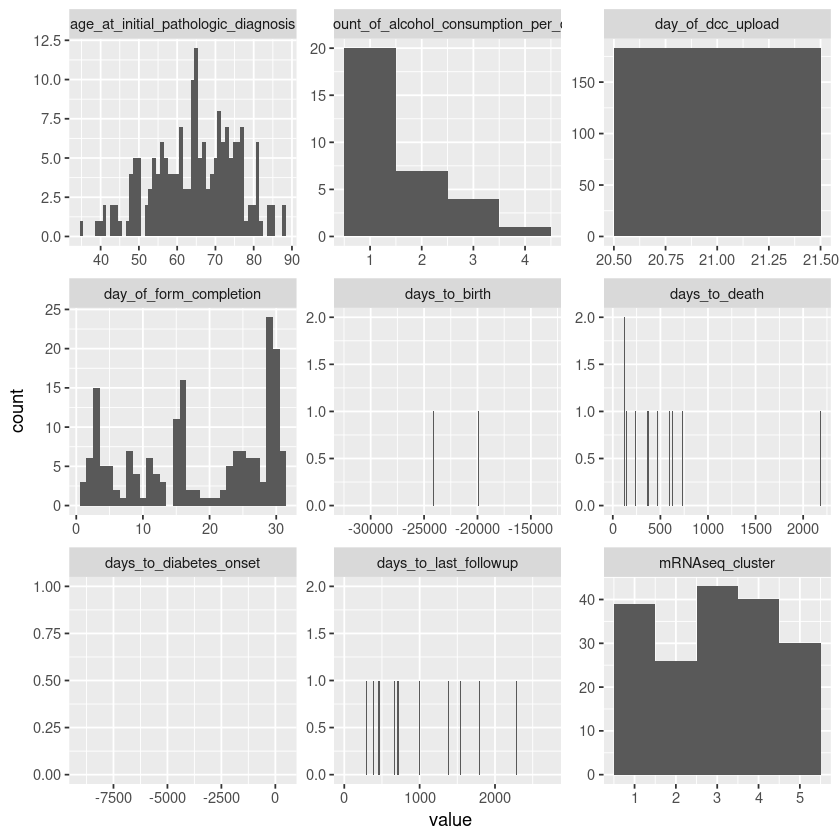

In [12]:
ggplot(gather(df_patient_num[,1:9], cols, value), aes(x = value)) + 
       geom_histogram(binwidth = 1) + facet_wrap(.~cols, scales = "free") 

Warning message:
“Removed 342 rows containing non-finite values (stat_bin).”


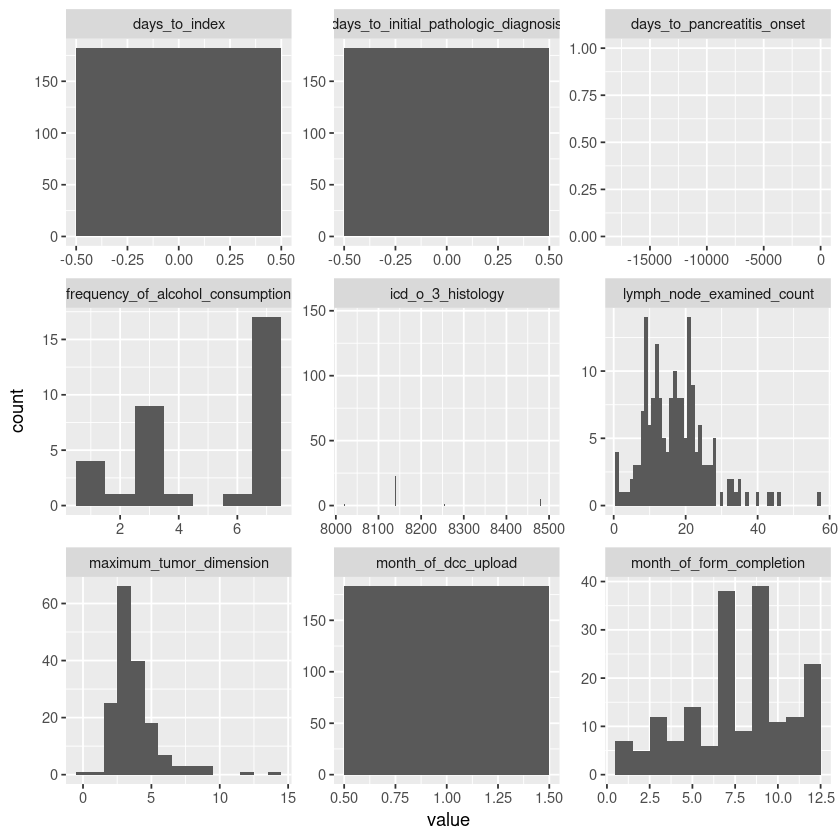

In [13]:
ggplot(gather(df_patient_num[,10:18], cols, value), aes(x = value)) + 
       geom_histogram(binwidth = 1) + facet_wrap(.~cols, scales = "free") 

Warning message:
“Removed 555 rows containing non-finite values (stat_bin).”


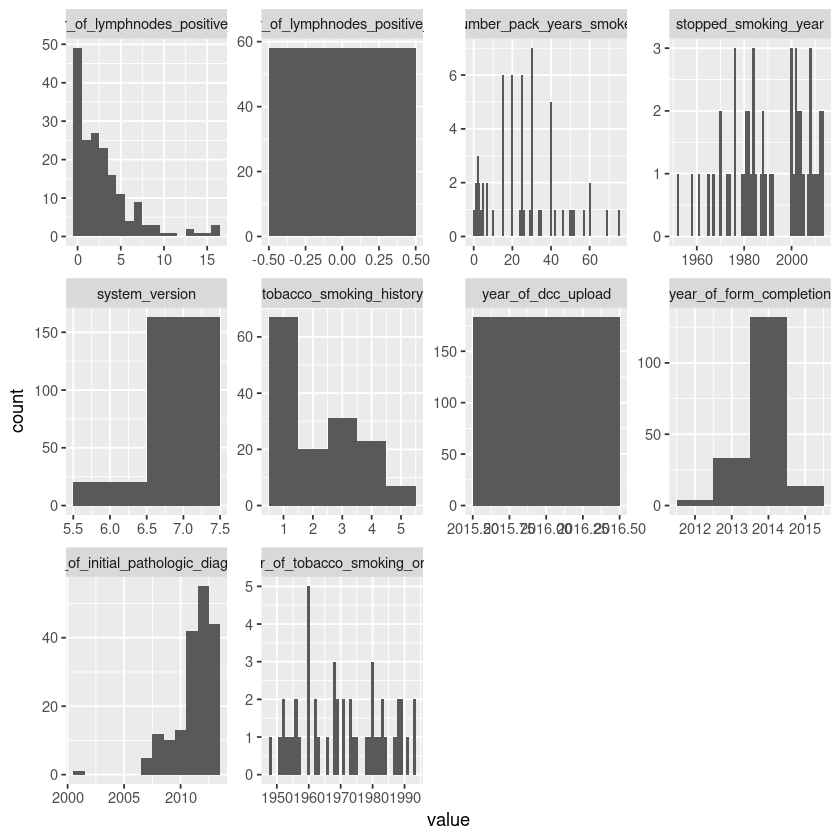

In [14]:
ggplot(gather(df_patient_num[,19:28], cols, value), aes(x = value)) + 
       geom_histogram(binwidth = 1) + facet_wrap(.~cols, scales = "free") 



## 
## Correlations - Pearson - Patients Data

In [ ]:
#install.packages("Hmisc")
#library(Hmisc)

corrPatient <- rcorr(as.matrix(df_patient_num))

#corrPatient_plot <- cor(as.matrix(df_patient_num), use="pairwise.complete.obs")

corrPatient_plot[is.na(corrPatient_plot)] <- 0

head(corrPatient_plot,5) # NA Values transformed to 0. For plotting purposes.

In [ ]:
# This function returns a Table with Rownames, Colnames, Correlation Coefficient, p-value
flattenCorrMatrix <- function(cormat, pmat) {
  ut <- upper.tri(cormat)
  data.frame(
    row = rownames(cormat)[row(cormat)[ut]],
    column = rownames(cormat)[col(cormat)[ut]],
    cor  =(cormat)[ut],
    p = pmat[ut]
    )
}

### Table of correlations

In [ ]:
# Visualize Correlation - Table

dffc <- flattenCorrMatrix(corrPatient2$r, corrPatient2$P)
dffc

### Plot

In [ ]:
# WAY 1:
heatmap(corrPatient)


# WAY 2:
#install.packages("corrplot")
library(corrplot)

#options(repr.plot.width = 30, repr.plot.height = 30.75, repr.plot.res = 100)

corrplot(corrPatient_plot, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

#### The most correlated features in the Patient Dataset seem to be ...

## Correlation - Pearson - Expression Dataset

In [ ]:
# Perform PEARSON correlation
corrExpression <- rcorr(as.matrix(t_expression_data))

# Transform Data for easy plotting
corrExpression_plot[is.na(corrPatient_plot)] <- 0
head(corrExpression_plot,5)

### Table of correlations

In [ ]:
# Provide a Table of correlations with p-values
dffcE <- flattenCorrMatrix(corrExpression$r, corrExpression$P)
dffcE %>% filter(dffcE[4] >= 0.7 | dffcE[4] <= -0.7)

### Plot

In [ ]:
# WAY 1 / WAY 2 / WAY 3 ???

# I would use only the most correlated ones from the previous table.

#### The most correlated features in the Expression Dataset seem to be ...


### --------------------------------------------------------------------------------------------------------------------------------------------------------------

## Clustering Analysis

## References

#### 01 - Baek, B., Lee, H. Prediction of survival and recurrence in patients with pancreatic cancer by integrating multi-omics data. Sci Rep 10, 18951 (2020). https://doi.org/10.1038/s41598-020-76025-1